# **Advertising Sales Prediction Using Multiple Linear Regression**

###### **Connect Google Drive**

In [1]:
#By using the Google Drive file ID, we can import a single file, e.g., csv or txt file, from Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###### **Import the modules**

In [203]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

###### **Load Dataset**

In [204]:
data = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/Datasets/Advertising_Sales_Prediction.csv"

###### **Dataset Description**

In [205]:
df = pd.read_csv(data)
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16,6.566231,2.907983,Mega,54.732757
1,13,9.237765,2.409567,Mega,46.677897
2,41,15.886446,2.913410,Mega,150.177829
3,83,30.020028,6.922304,Mega,298.246340
4,15,8.437408,1.405998,Micro,56.594181


In [206]:
df.dtypes

,0
TV,int64
Radio,float64
Social Media,float64
Influencer,object
Sales,float64


In [207]:
df.shape

(4572, 5)

In [7]:
df.describe()

,TV,Radio,Social Media,Sales
count,4572.000000,4568.000000,4566.000000,4566.000000
mean,54.058618,18.160356,3.323956,192.466602
std,26.101674,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4572 non-null   int64  
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 178.7+ KB


###### **Data Preprocessing**

In [209]:
df["TV"].notnull().sum()

np.int64(4572)

###### **Encoding Categorical Variables**

In [210]:
unique_items = df["Influencer"].unique()
print(unique_items)

['Mega' 'Micro' 'Nano' 'Macro']


In [211]:
mapping_list = {'Nano': 0,
                'Micro': 1,
                'Macro': 2,
                'Mega': 3 }

df["influencer"] = df["Influencer"].map(mapping_list).astype(int)

In [212]:
df.head()

,TV,Radio,Social Media,Influencer,Sales,influencer
0,16,6.566231,2.907983,Mega,54.732757,3
1,13,9.237765,2.409567,Mega,46.677897,3
2,41,15.886446,2.913410,Mega,150.177829,3
3,83,30.020028,6.922304,Mega,298.246340,3
4,15,8.437408,1.405998,Micro,56.594181,1


In [213]:
df.drop(columns = ["Influencer"],inplace=True)

In [214]:
df.head()

,TV,Radio,Social Media,Sales,influencer
0,16,6.566231,2.907983,54.732757,3
1,13,9.237765,2.409567,46.677897,3
2,41,15.886446,2.913410,150.177829,3
3,83,30.020028,6.922304,298.246340,3
4,15,8.437408,1.405998,56.594181,1


In [215]:
df.rename(columns={"influencer" : "Influencer"},inplace = True)

In [216]:
df.head()

,TV,Radio,Social Media,Sales,Influencer
0,16,6.566231,2.907983,54.732757,3
1,13,9.237765,2.409567,46.677897,3
2,41,15.886446,2.913410,150.177829,3
3,83,30.020028,6.922304,298.246340,3
4,15,8.437408,1.405998,56.594181,1


In [217]:
sum_of_column = {}
mean_of_column = {}
std_of_column = {}
median_of_column = {}
max_of_column = {}

for col in df :

  sum_of_column[col] = df[col].sum()

  mean_of_column[col] = sum_of_column[col]/df[col].notnull().sum()

  std_of_column[col] = df[col].std()

  median_of_column[col] = df[col].median()

  max_of_column[col] = df[col].max()

  print(f"{col}")
  print(f"sum of {col}= {sum}")
  print(f"mean of {col}= {mean_of_column[col] }")
  print(f"std of {col}= {std_of_column[col] }")
  print(f"median of {col}= {median_of_column[col] }")
  print(f"max of {col}= {max_of_column[col] }")
  print("---------------------------------------------------------------")

TV
sum of TV= <built-in function sum>
mean of TV= 54.0586176727909
std of TV= 26.101673752225587
median of TV= 53.0
max of TV= 100
---------------------------------------------------------------
Radio
sum of Radio= <built-in function sum>
mean of Radio= 18.160355892662654
std of Radio= 9.676958456095425
median of Radio= 17.85951293
max of Radio= 48.87116125
---------------------------------------------------------------
Social Media
sum of Social Media= <built-in function sum>
mean of Social Media= 3.323956161385458
std of Social Media= 2.2126702639216544
median of Social Media= 3.055565435
max of Social Media= 13.98166208
---------------------------------------------------------------
Sales
sum of Sales= <built-in function sum>
mean of Sales= 192.46660210662066
std of Sales= 93.13309168784251
median of Sales= 189.23117235
max of Sales= 364.0797515
---------------------------------------------------------------
Influencer
sum of Influencer= <built-in function sum>
mean of Influencer= 1

In [18]:
df.isnull().sum()

,0
TV,0
Radio,4
Social Media,6
Sales,6
Influencer,0


###### **Handling Missing Values**

In [218]:
df["Radio"] = df["Radio"].fillna(median_of_column["Radio"])
df["Social Media"] = df["Social Media"].fillna(median_of_column["Social Media"])
df["Sales"] = df["Sales"].fillna(median_of_column["Sales"])

In [20]:
df.isnull().sum()

,0
TV,0
Radio,0
Social Media,0
Sales,0
Influencer,0


###### **Exploratory Data Analysis (EDA)**

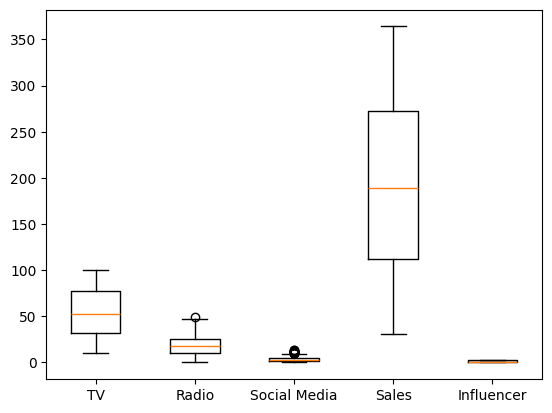

In [219]:
plt.boxplot([df["TV"], df["Radio"], df["Social Media"], df["Sales"], df["Influencer"]], tick_labels=['TV', 'Radio', 'Social Media', 'Sales','Influencer'])
plt.show()

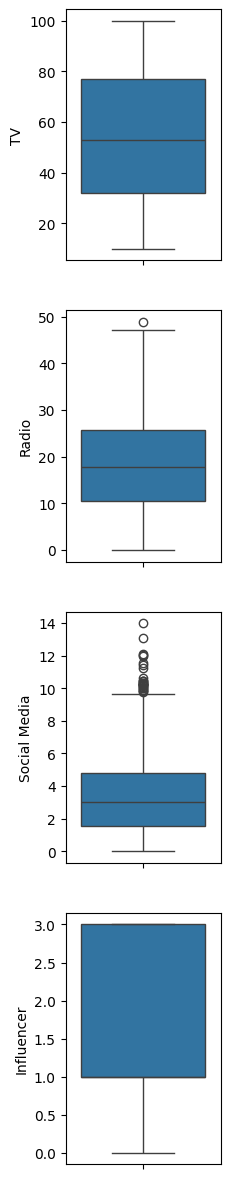

In [220]:
fig, axs = plt.subplots(4,figsize = (2,15))
plt1 = sns.boxplot(df["TV"],ax = axs[0])
plt2 = sns.boxplot(df["Radio"],ax = axs[1])
plt3 = sns.boxplot(df["Social Media"],ax = axs[2])
plt4 = sns.boxplot(df["Influencer"],ax = axs[3])

In [221]:
display(df)


thrid_col = df.pop("Influencer")
df.insert(3,"Influencer",thrid_col)

display(df)

,TV,Radio,Social Media,Sales,Influencer
0,16,6.566231,2.907983,54.732757,3
1,13,9.237765,2.409567,46.677897,3
2,41,15.886446,2.913410,150.177829,3
3,83,30.020028,6.922304,298.246340,3
4,15,8.437408,1.405998,56.594181,1
...,...,...,...,...,...
4567,26,4.472360,0.717090,94.685866,1
4568,71,20.610685,6.545573,249.101915,0
4569,44,19.800072,5.096192,163.631457,1
4570,71,17.534640,1.940873,253.610411,2


,TV,Radio,Social Media,Influencer,Sales
0,16,6.566231,2.907983,3,54.732757
1,13,9.237765,2.409567,3,46.677897
2,41,15.886446,2.913410,3,150.177829
3,83,30.020028,6.922304,3,298.246340
4,15,8.437408,1.405998,1,56.594181
...,...,...,...,...,...
4567,26,4.472360,0.717090,1,94.685866
4568,71,20.610685,6.545573,0,249.101915
4569,44,19.800072,5.096192,1,163.631457
4570,71,17.534640,1.940873,2,253.610411


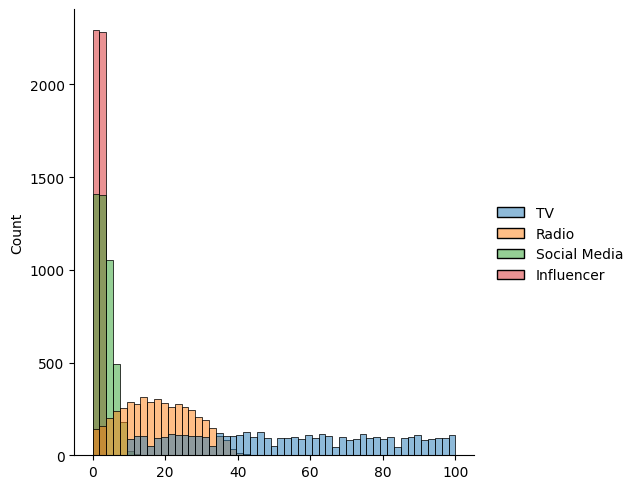

In [28]:
sns.displot(df[["TV","Radio","Social Media","Influencer"]])
plt.show()

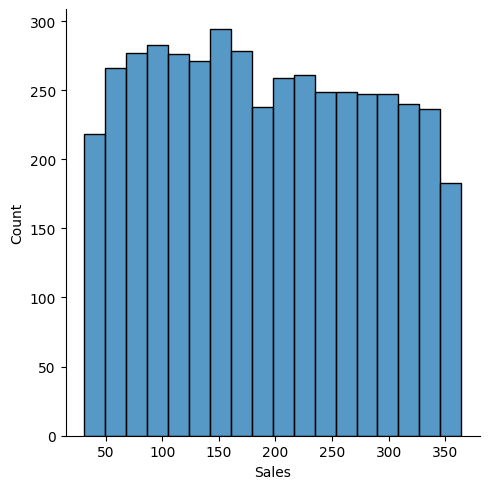

In [30]:
sns.displot(df["Sales"])
plt.show()

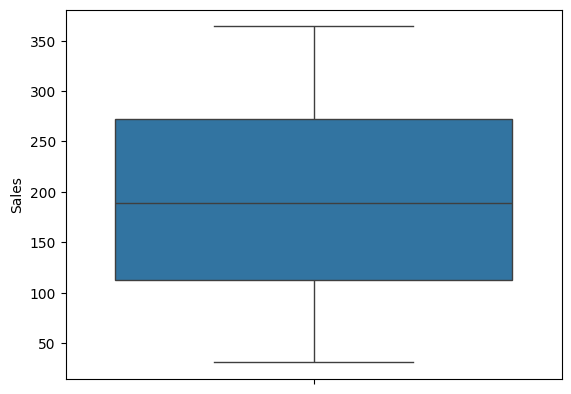

In [31]:
sns.boxplot(df['Sales'])
plt.show()

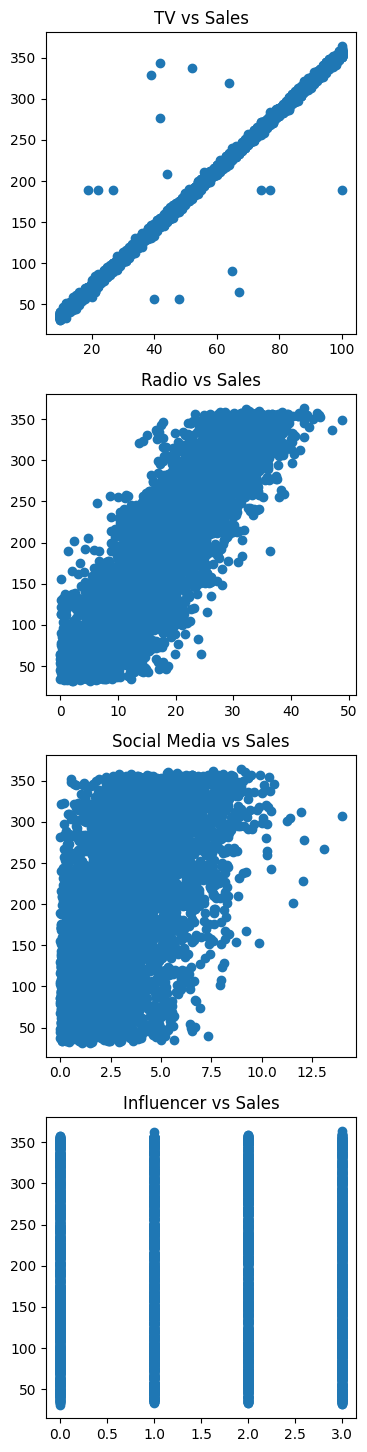

In [49]:
fig, axs = plt.subplots(4,figsize=(4,18))

axs[0].scatter(df["TV"], df["Sales"])
axs[0].set_title("TV vs Sales")

axs[1].scatter(df["Radio"], df["Sales"])
axs[1].set_title("Radio vs Sales")

axs[2].scatter(df["Social Media"], df["Sales"])
axs[2].set_title("Social Media vs Sales")

axs[3].scatter(df["Influencer"], df["Sales"])
axs[3].set_title("Influencer vs Sales")

plt.show()

###### **Feature Selection**

In [222]:
X = df[["TV","Radio"]]
y = df["Sales"]

In [223]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

###### **Feature Scaling**

In [224]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###### **Model Building**

In [225]:
model = LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [226]:
intercept_value = model.intercept_
slope_value = model.coef_

In [227]:
print(f"Intercept value = {intercept_value}")
print(f"Slope value = {slope_value}")

Intercept value = 192.35300562154566
Slope value = [91.05982138  1.69203694]


In [228]:
y_predicted = model.predict(X_test_scaled)

###### **Model Evaluation**

In [229]:
r2 = r2_score(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
mae = mean_absolute_error(y_test,y_predicted)

In [231]:
print(f"r2 : {r2}")
print(f"mse : {mse}")
print(f"mae : {mae}")

r2 : 0.9924575998258258
mse : 66.03614070365909
mae : 3.0125733595621993
